In [1]:
import xarray as xr
import numpy as np
import pylab as plt
import cartopy.crs as ccrs
import cmocean
import copy as cp
from scipy.interpolate import griddata, interp1d
import pickle
import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.cm import get_cmap
import cartopy as cr
import matplotlib.cm as cm
from datetime import datetime as dtime
import matplotlib.colors as colors

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
def get_ind_sections(LAT, LON):
    LON[np.where(LON<0)[0]] = LON[np.where(LON<0)[0]]+360
    L_PB = []
    L_ACC = []
    L_EU = []
    L_CB = []
    L_valids = []
    for n in range(LAT.shape[0]):
        if np.any(np.logical_and(np.logical_and(LON[n,:]>204, LON[n,:]<206), LAT[n,:]<73)):
            L_PB.append(n)
        if np.any(np.logical_and(LON[n,:]>235,  LAT[n,:]<73)):
            L_ACC.append(n)
        if np.any(np.logical_and(np.logical_and(np.logical_and(LON[n,:]>155, LON[n,:]<156), LAT[n,:]<78), LAT[n, :]>74)):
            L_EU.append(n)
        if np.sum(~np.isnan(ds.lat.values[n,:]))>2:
            L_valids.append(np.sum(~np.isnan(ds.lat.values[n,:])))
        if np.any(np.logical_and(np.logical_and(np.logical_and(LON[n,:]>202, LON[n,:]<204), LAT[n,:]>74), LAT[n,:]<80)) and LON[n,:][-1]>204:
            L_CB.append(n)
    return L_PB, L_ACC, L_EU, L_CB,  L_valids

# Load runs of sensibility

In [4]:
Liste_files = sorted(glob.glob('/mnt/shackleton/storage3/nplanat/OP/*.nc'))
print('I generated ', len(Liste_files), ' out of 680 files')

I generated  210  out of 680 files


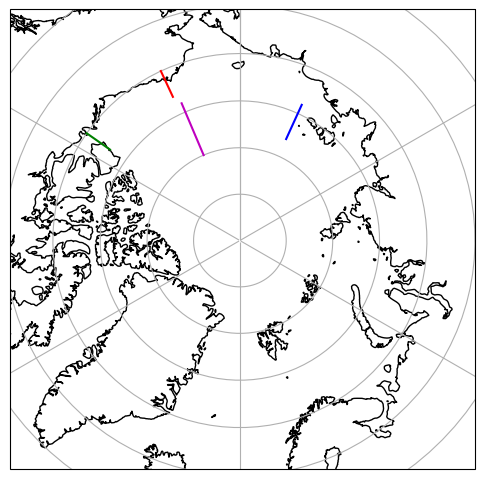

In [4]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1,  projection = ccrs.NorthPolarStereo())
ax.coastlines()
ax.gridlines()
ax.set_extent([-200, 90, 65, 90], crs=ccrs.PlateCarree())
#bathy.val.plot.contour(alpha = 0.5, levels = [38, 22], colors = 'k',ax=ax, transform=ccrs.PlateCarree(), x='Lons_reg_360', y='Lats_reg', add_colorbar=False,  infer_intervals=True)       
ax.plot(np.ones(10)*205, np.linspace(70, 73, 10), 'r', transform = ccrs.PlateCarree())
ax.plot(np.ones(10)*235, np.linspace(70, 73, 10), 'g', transform = ccrs.PlateCarree())
ax.plot(np.ones(10)*155.5, np.linspace(74, 78, 10), 'b', transform = ccrs.PlateCarree())
ax.plot(np.ones(10)*203, np.linspace(74, 80, 10), 'm', transform = ccrs.PlateCarree())

In [5]:
# make table with all dimensions
h = np.arange(5, 45, 5)
z = np.arange(10, 90, 10)
t = np.array([1, 5, 10, 15, 20, 30, 60, 120, 180, 360])
dh = len(h)
dz = len(z)
dt = len(t)

A = np.zeros((dh, dz, dt)) #PB
B = np.zeros((dh, dz, dt)) #ACC
C = np.zeros((dh, dz, dt)) #EU
D = np.zeros((dh, dz, dt)) #CB
E = np.zeros((dh, dz, dt)) #Valids

In [6]:
ds_ratios = xr.Dataset(coords={'h':h, 'z':z, 't':t})

In [7]:
i = 1
for file in Liste_files:
    print(i, '/', len(Liste_files))
    i+=1
    ds = xr.open_dataset(file)
    a,b,c,d, L_valids  = get_ind_sections(ds.lat.values, ds.lon.values)
    name = file.split('_')
    hh = int(name[1])
    zz = int(name[2])
    tt = int(name[3])  
    A[np.where(h==hh)[0], np.where(z==zz)[0], np.where(t==tt)[0]] = len(a)
    B[np.where(h==hh)[0], np.where(z==zz)[0], np.where(t==tt)[0]] = len(b)
    C[np.where(h==hh)[0], np.where(z==zz)[0], np.where(t==tt)[0]] = len(c)
    D[np.where(h==hh)[0], np.where(z==zz)[0], np.where(t==tt)[0]] = len(d)
    E[np.where(h==hh)[0], np.where(z==zz)[0], np.where(t==tt)[0]] = len(L_valids)

1 / 145
2 / 145
3 / 145
4 / 145
5 / 145
6 / 145
7 / 145
8 / 145
9 / 145
10 / 145
11 / 145
12 / 145
13 / 145
14 / 145
15 / 145
16 / 145
17 / 145
18 / 145
19 / 145
20 / 145
21 / 145
22 / 145
23 / 145
24 / 145
25 / 145
26 / 145
27 / 145
28 / 145
29 / 145
30 / 145
31 / 145
32 / 145
33 / 145
34 / 145
35 / 145
36 / 145
37 / 145
38 / 145
39 / 145
40 / 145
41 / 145
42 / 145
43 / 145
44 / 145
45 / 145
46 / 145
47 / 145
48 / 145
49 / 145
50 / 145
51 / 145
52 / 145
53 / 145
54 / 145
55 / 145
56 / 145
57 / 145
58 / 145
59 / 145
60 / 145
61 / 145
62 / 145
63 / 145
64 / 145
65 / 145
66 / 145
67 / 145
68 / 145
69 / 145
70 / 145
71 / 145
72 / 145
73 / 145
74 / 145
75 / 145
76 / 145
77 / 145
78 / 145
79 / 145
80 / 145
81 / 145
82 / 145
83 / 145
84 / 145
85 / 145
86 / 145
87 / 145
88 / 145
89 / 145
90 / 145
91 / 145
92 / 145
93 / 145
94 / 145
95 / 145
96 / 145
97 / 145
98 / 145
99 / 145
100 / 145
101 / 145
102 / 145
103 / 145
104 / 145
105 / 145
106 / 145
107 / 145
108 / 145
109 / 145
110 / 145
111 / 14

In [8]:
ds_ratios['PB'] = (('h', 'z', 't'), A)
ds_ratios['ACC'] = (('h', 'z', 't'), B)
ds_ratios['EU'] = (('h', 'z', 't'), C)
ds_ratios['CB'] = (('h', 'z', 't'), D)
ds_ratios['Valids'] = (('h', 'z', 't'), E)

In [9]:
ds_ratios

<xarray.Dataset>
Dimensions:  (h: 8, z: 8, t: 10)
Coordinates:
  * h        (h) int64 5 10 15 20 25 30 35 40
  * z        (z) int64 10 20 30 40 50 60 70 80
  * t        (t) int64 1 5 10 15 20 30 60 120 180 360
Data variables:
    PB       (h, z, t) float64 165.0 170.0 170.0 167.0 163.0 ... 0.0 0.0 0.0 0.0
    ACC      (h, z, t) float64 12.0 10.0 12.0 7.0 11.0 ... 0.0 0.0 0.0 0.0 0.0
    EU       (h, z, t) float64 42.0 37.0 53.0 42.0 46.0 ... 0.0 0.0 0.0 0.0 0.0
    CB       (h, z, t) float64 4.0 3.0 3.0 3.0 2.0 3.0 ... 0.0 0.0 0.0 0.0 0.0
    Valids   (h, z, t) float64 1.393e+03 1.393e+03 1.393e+03 ... 0.0 0.0 0.0

# Plots

Text(0.5, 1.0, 'h - CB')

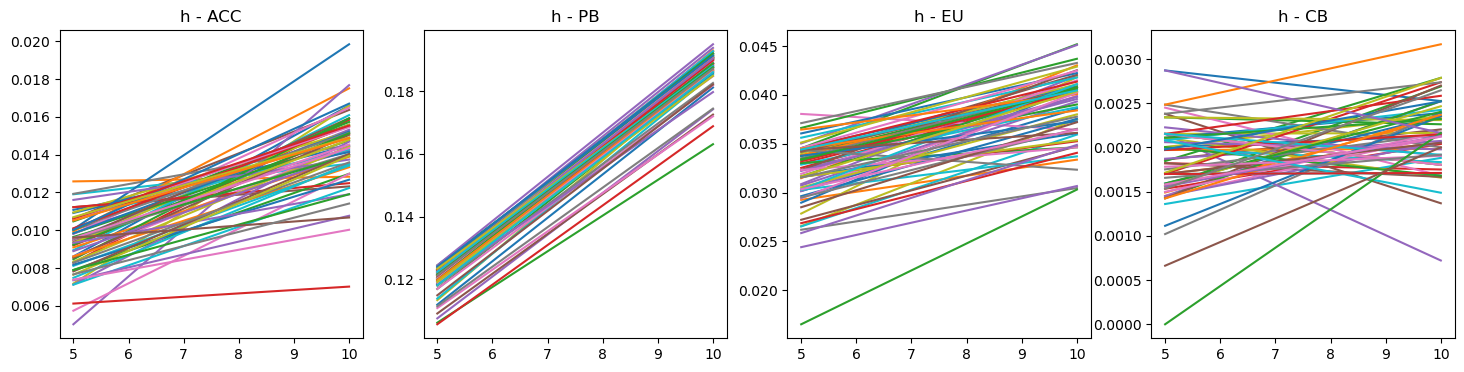

In [13]:
# h 
f = plt.figure(figsize= (18, 4))
ax = f.add_subplot(1,4,1)
for t in ds_ratios.t.values:
    for z in ds_ratios.z.values:
        ax.plot(ds_ratios.h.values, ds_ratios.sel(t = t).sel(z=z).ACC.values/ds_ratios.sel(t = t).sel(z=z).Valids.values)
ax.set_title('h - ACC')   

ax = f.add_subplot(1,4,2)
for t in ds_ratios.t.values:
    for z in ds_ratios.z.values:
        ax.plot(ds_ratios.h.values, ds_ratios.sel(t = t).sel(z=z).PB.values/ds_ratios.sel(t = t).sel(z=z).Valids.values)
ax.set_title('h - PB')   

ax = f.add_subplot(1,4,3)
for t in ds_ratios.t.values:
    for z in ds_ratios.z.values:
        ax.plot(ds_ratios.h.values, ds_ratios.sel(t = t).sel(z=z).EU.values/ds_ratios.sel(t = t).sel(z=z).Valids.values)
ax.set_title('h - EU')   

ax = f.add_subplot(1,4,4)
for t in ds_ratios.t.values:
    for z in ds_ratios.z.values:
        ax.plot(ds_ratios.h.values, ds_ratios.sel(t = t).sel(z=z).CB.values/ds_ratios.sel(t = t).sel(z=z).Valids.values)
ax.set_title('h - CB')  

Text(0.5, 1.0, 'z - CB')

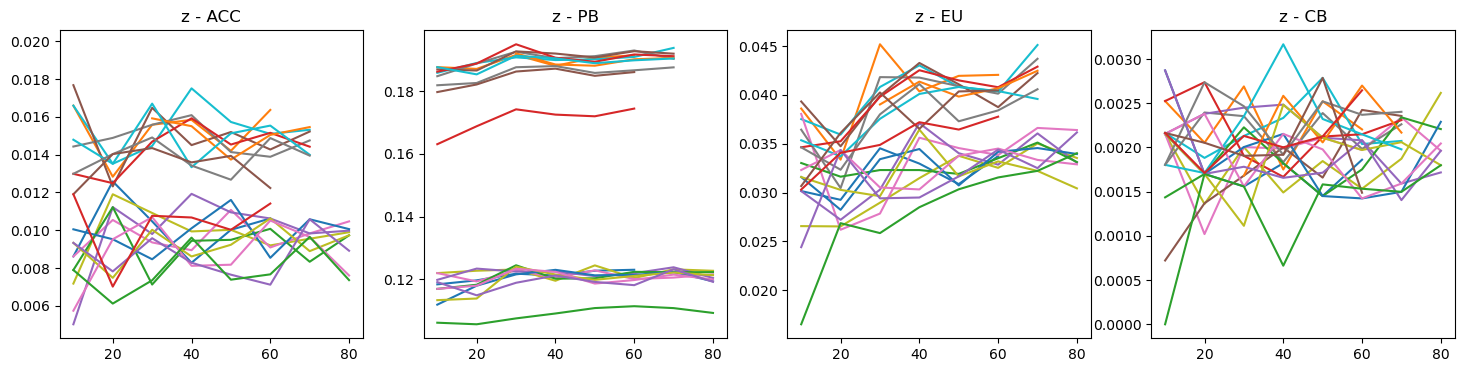

In [14]:
# z 
f = plt.figure(figsize= (18, 4))
ax = f.add_subplot(1,4,1)
for t in ds_ratios.t.values:
    for h in ds_ratios.h.values:
        ax.plot(ds_ratios.z.values, ds_ratios.sel(t = t).sel(h=h).ACC.values/ds_ratios.sel(t = t).sel(h=h).Valids.values)
ax.set_title('z - ACC')   

ax = f.add_subplot(1,4,2)
for t in ds_ratios.t.values:
    for h in ds_ratios.h.values:
        ax.plot(ds_ratios.z.values, ds_ratios.sel(t = t).sel(h=h).PB.values/ds_ratios.sel(t = t).sel(h=h).Valids.values)
ax.set_title('z - PB')   

ax = f.add_subplot(1,4,3)
for t in ds_ratios.t.values:
    for h in ds_ratios.h.values:
        ax.plot(ds_ratios.z.values, ds_ratios.sel(t = t).sel(h=h).EU.values/ds_ratios.sel(t = t).sel(h=h).Valids.values)
ax.set_title('z - EU')   

ax = f.add_subplot(1,4,4)
for t in ds_ratios.t.values:
    for h in ds_ratios.h.values:
        ax.plot(ds_ratios.z.values, ds_ratios.sel(t = t).sel(h=h).CB.values/ds_ratios.sel(t = t).sel(h=h).Valids.values)
ax.set_title('z - CB')  

(0.0, 60.0)

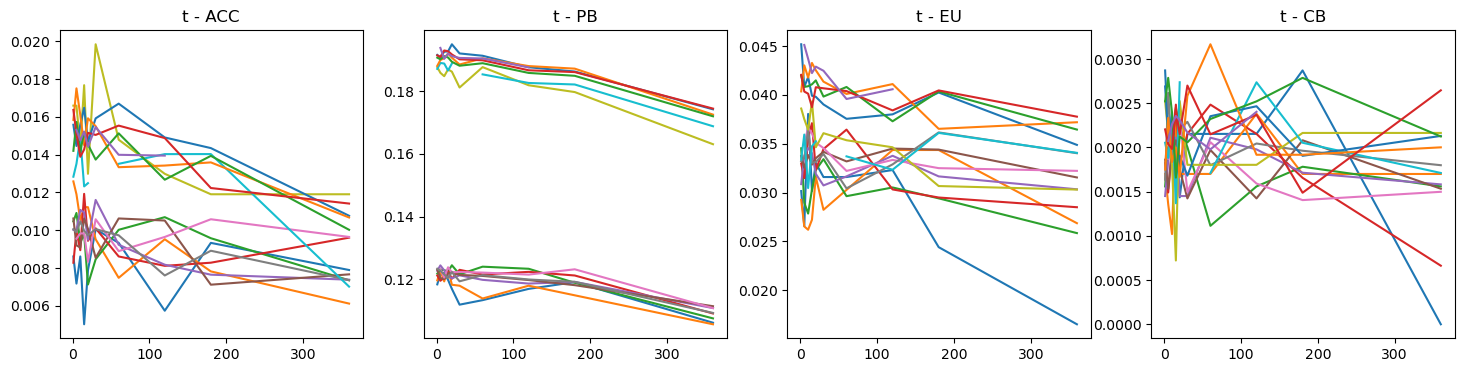

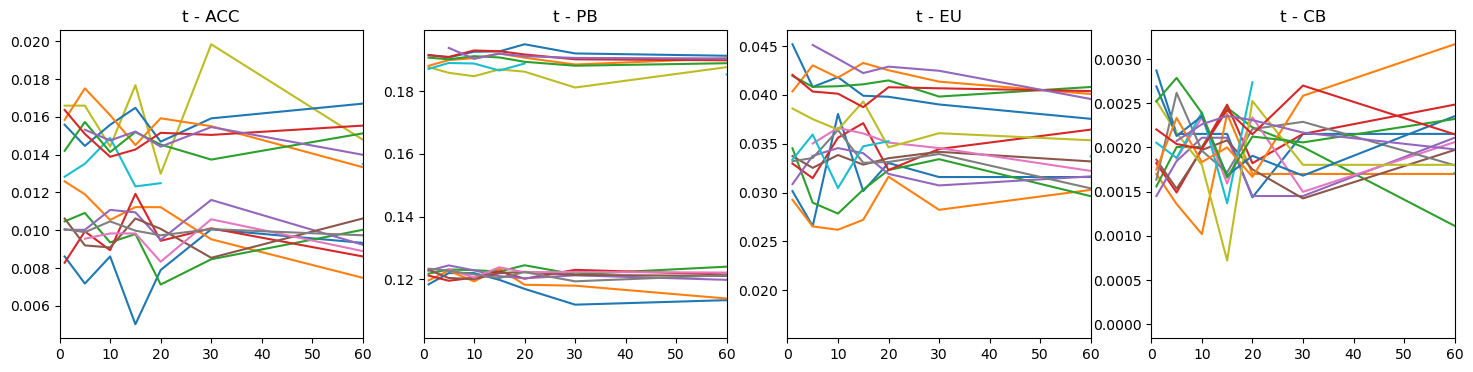

In [18]:
# t 
f = plt.figure(figsize= (18, 4))
ax = f.add_subplot(1,4,1)
for h in ds_ratios.h.values:
    for z in ds_ratios.z.values:
        ax.plot(ds_ratios.t.values, ds_ratios.sel(h=h).sel(z=z).ACC.values/ds_ratios.sel(h=h).sel(z=z).Valids.values)
ax.set_title('t - ACC')   

ax = f.add_subplot(1,4,2)
for h in ds_ratios.h.values:
    for z in ds_ratios.z.values:
        ax.plot(ds_ratios.t.values, ds_ratios.sel(h=h).sel(z=z).PB.values/ds_ratios.sel(h=h).sel(z=z).Valids.values)
ax.set_title('t - PB')   

ax = f.add_subplot(1,4,3)
for h in ds_ratios.h.values:
    for z in ds_ratios.z.values:
        ax.plot(ds_ratios.t.values, ds_ratios.sel(h=h).sel(z=z).EU.values/ds_ratios.sel(h=h).sel(z=z).Valids.values)
ax.set_title('t - EU')   

ax = f.add_subplot(1,4,4)
for h in ds_ratios.h.values:
    for z in ds_ratios.z.values:
        ax.plot(ds_ratios.t.values, ds_ratios.sel(h=h).sel(z=z).CB.values/ds_ratios.sel(h=h).sel(z=z).Valids.values)
ax.set_title('t - CB')  

# t 
f = plt.figure(figsize= (18, 4))
ax = f.add_subplot(1,4,1)
for h in ds_ratios.h.values:
    for z in ds_ratios.z.values:
        ax.plot(ds_ratios.t.values, ds_ratios.sel(h=h).sel(z=z).ACC.values/ds_ratios.sel(h=h).sel(z=z).Valids.values)
ax.set_title('t - ACC')   
ax.set_xlim([0, 60])

ax = f.add_subplot(1,4,2)
for h in ds_ratios.h.values:
    for z in ds_ratios.z.values:
        ax.plot(ds_ratios.t.values, ds_ratios.sel(h=h).sel(z=z).PB.values/ds_ratios.sel(h=h).sel(z=z).Valids.values)
ax.set_title('t - PB')   
ax.set_xlim([0, 60])

ax = f.add_subplot(1,4,3)
for h in ds_ratios.h.values:
    for z in ds_ratios.z.values:
        ax.plot(ds_ratios.t.values, ds_ratios.sel(h=h).sel(z=z).EU.values/ds_ratios.sel(h=h).sel(z=z).Valids.values)
ax.set_title('t - EU')   
ax.set_xlim([0, 60])

ax = f.add_subplot(1,4,4)
for h in ds_ratios.h.values:
    for z in ds_ratios.z.values:
        ax.plot(ds_ratios.t.values, ds_ratios.sel(h=h).sel(z=z).CB.values/ds_ratios.sel(h=h).sel(z=z).Valids.values)
ax.set_title('t - CB')  
ax.set_xlim([0, 60])